In [50]:
import pandas as pd
import seaborn as sns
import matplotlib as mlb
mlb.rcParams['figure.figsize']=(10,6)
mlb.rcParams['font.size']=22
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

In [51]:
passageiros = pd.read_csv('passageiros.csv')
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

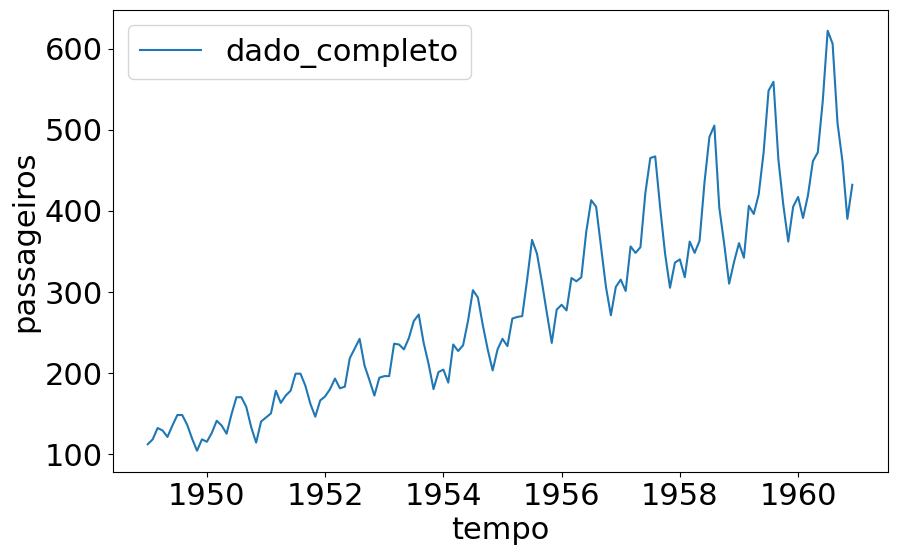

In [52]:
sns.lineplot(x='tempo', y='passageiros', data=passageiros, label='dado_completo')

In [53]:
sc = StandardScaler()
sc.fit(passageiros)

StandardScaler()

In [54]:
dado_escalado = sc.transform(passageiros)

In [55]:
x = dado_escalado[:,0]
y = dado_escalado[:,1]

Text(0.5, 0, 'data')

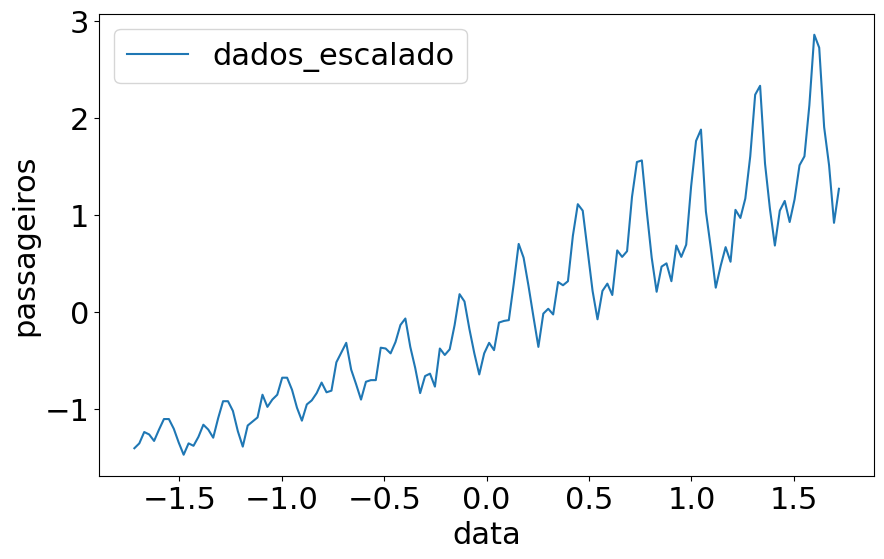

In [56]:
sns.lineplot(x=x,y=y,label='dados_escalado')
plt.ylabel('passageiros')
plt.xlabel('data')

In [57]:
tamanho_treino = int(len(passageiros)*0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [58]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [59]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'data')

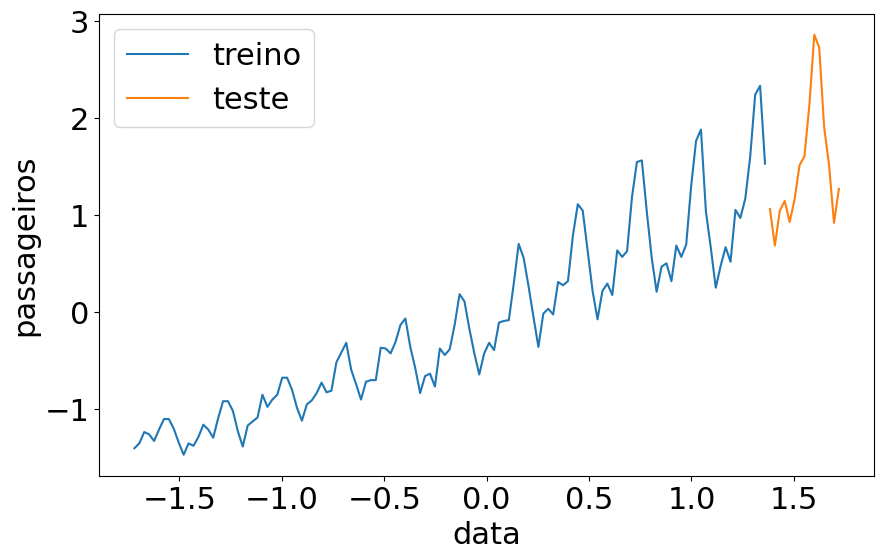

In [60]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
plt.ylabel('passageiros')
plt.xlabel('data')

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
regressor = Sequential()

In [63]:
regressor.add(Dense(1,input_dim=1, kernel_initializer='Ones', activation='linear', use_bias=False))

In [64]:
regressor.compile(loss='mean_squared_error', optimizer='adam')

In [65]:
regressor.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [66]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 3ms/step - loss: 0.1286


In [67]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 4ms/step


<Axes: >

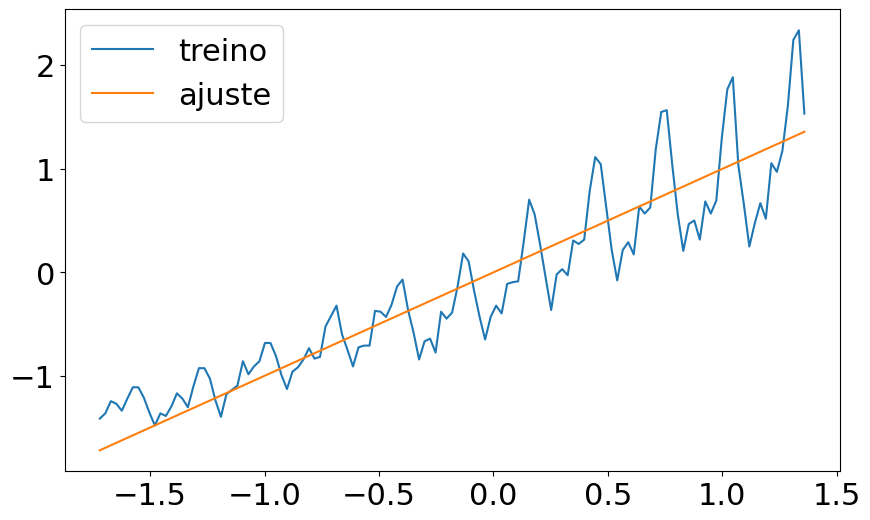

In [68]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste')

In [69]:
d = {'tempo': xtreino, 'passageiros':y_predict[:,0]}
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.713210
1,-1.696007,-1.689250
2,-1.671950,-1.665288
3,-1.647894,-1.641328
4,-1.623837,-1.617366
...,...,...
124,1.262984,1.257952
125,1.287041,1.281913
126,1.311098,1.305874
127,1.335155,1.329835


In [70]:
resultado_transf = sc.inverse_transform(resultados)

In [71]:
resultado_transf = pd.DataFrame(resultado_transf)

In [72]:
resultado_transf.columns=['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

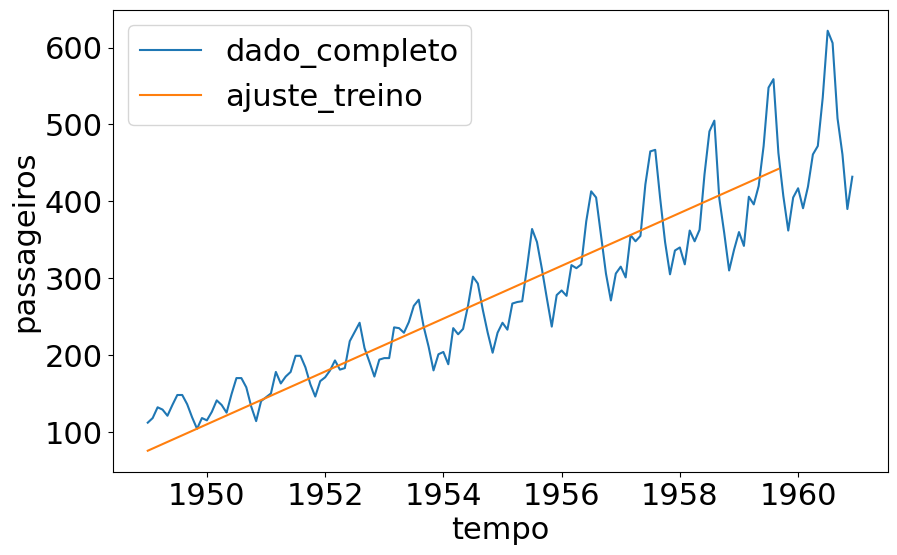

In [73]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf, label='ajuste_treino')

In [74]:
y_predict_test = regressor.predict(xteste)

1/1 [==============================] - 0s 39ms/step


In [75]:
d = {'tempo':xteste, 'passageiros': y_predict_test[:,0]}
resultado_teste = pd.DataFrame(data=d)

In [76]:
resultado_transf_teste = sc.inverse_transform(resultado_teste)
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns=['tempo','passageiros']

<Axes: xlabel='tempo', ylabel='passageiros'>

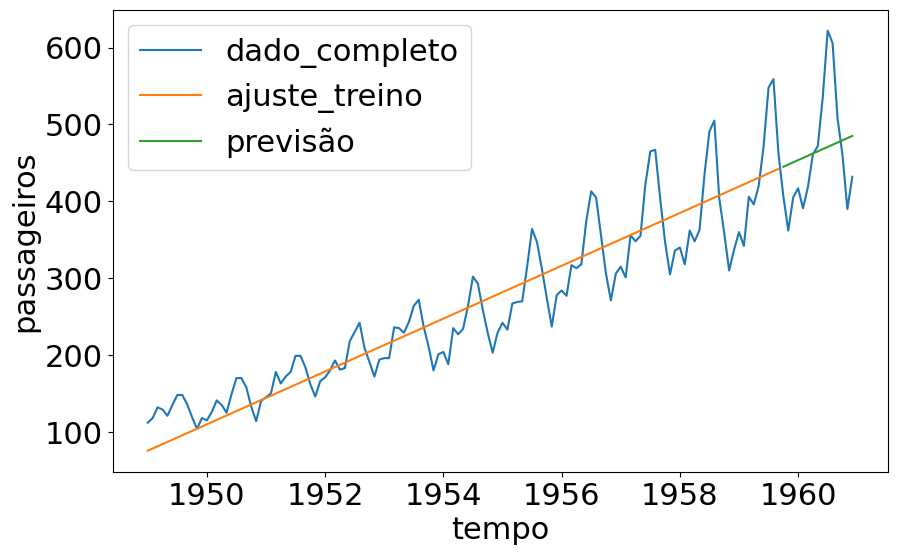

In [77]:
sns.lineplot(x='tempo',y='passageiros',data=passageiros, label='dado_completo')
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf, label='ajuste_treino')
sns.lineplot(x='tempo',y='passageiros',data=resultado_transf_teste, label='previsão')

In [78]:
regressor2 = Sequential()

regressor2.add(Dense(8,input_dim=1,kernel_initializer='random_uniform',activation='linear',use_bias=False))
regressor2.add(Dense(8,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))
regressor2.add(Dense(1,kernel_initializer='random_uniform',activation='sigmoid',use_bias=False))

In [79]:
regressor2.compile(loss='mean_squared_error', optimizer='adam')

In [80]:
regressor2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 8         
                                                                 
 dense_9 (Dense)             (None, 8)                 64        
                                                                 
 dense_10 (Dense)            (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [81]:
regressor2.fit(xtreino,ytreino,epochs=500)

Epoch 1/500
5/5 [==============================] - 1s 5ms/step - loss: 1.2322
Epoch 2/500
5/5 [==============================] - 0s 4ms/step - loss: 1.2254
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2190
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2131
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2078
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 1.2028
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1977
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1928
Epoch 9/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1878
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1824
Epoch 11/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1770
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 1.1706
Epoch 13/500
5/5 [==============================] - 0s 4ms/st

In [82]:
y_predict = regressor2.predict(xtreino)
y_predict_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 20ms/step


<Axes: >

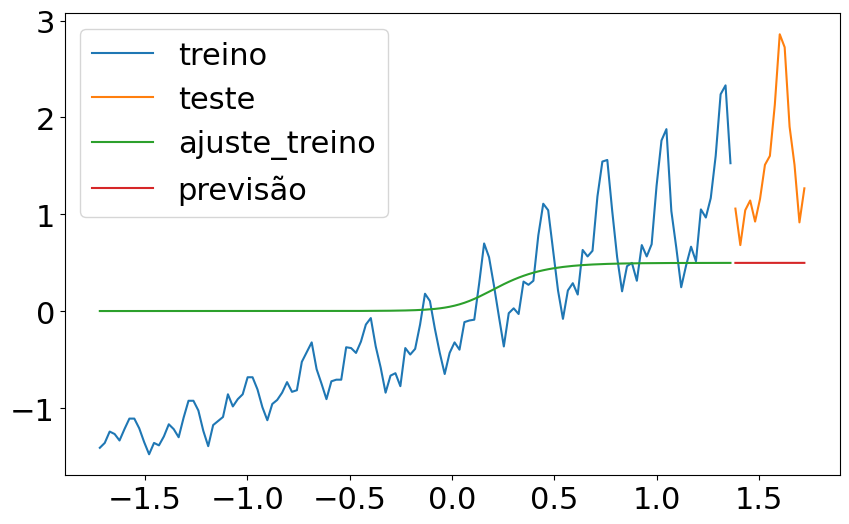

In [83]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

In [84]:
import numpy as np
vetor = pd.DataFrame(ytreino)[0]

def separa_dados(vetor, n_passos):
  x_novo,y_novo = [] , []

  for i in range(n_passos, vetor.shape[0]):
    x_novo.append(list(vetor.loc[i-n_passos: i -1]))
    y_novo.append(vetor.loc[i])
  x_novo, y_novo = np.array(x_novo), np.array(y_novo)
  return x_novo, y_novo

In [85]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [86]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [87]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [88]:
vetor2 = pd.DataFrame(yteste)[0]

In [89]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

In [90]:
regressor3 = Sequential()
regressor3.add(Dense(8,input_dim=1, kernel_initializer='Ones', activation = 'linear', use_bias=False))
regressor3.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor3.add(Dense(1,kernel_initializer='random_uniform',activation='linear', use_bias=False))
regressor3.compile(loss='mean_squared_error', optimizer = 'adam')
regressor3.fit(xtreino_novo,ytreino_novo,epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7821
Epoch 2/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7484
Epoch 3/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7324
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.7071
Epoch 5/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6834
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6612
Epoch 7/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6359
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6074
Epoch 9/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5824
Epoch 10/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5482
Epoch 11/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5166
Epoch 12/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4790
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [91]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='tempo', ylabel='0'>

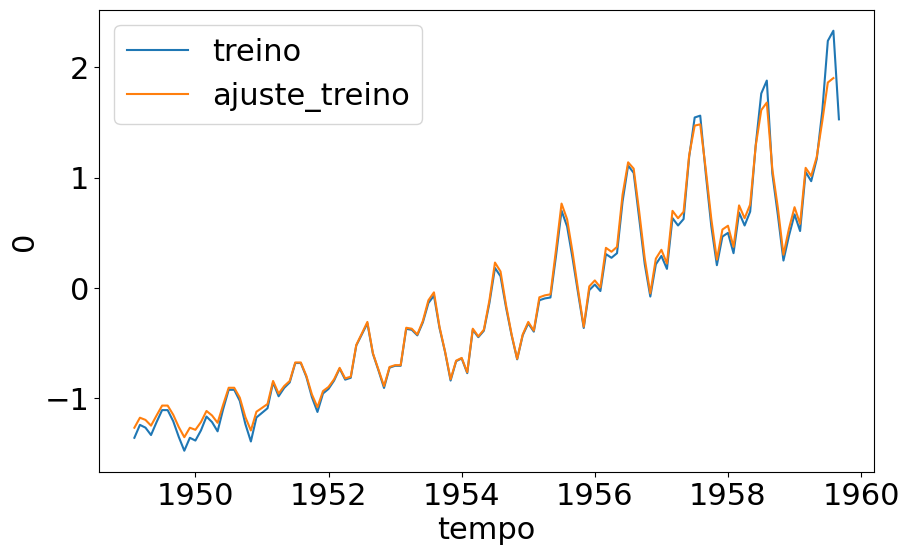

In [92]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo) [0], data=passageiros[1:129], label='ajuste_treino')

In [93]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 66ms/step


In [94]:
resultado = pd.DataFrame(y_predict_teste_novo) [0]

<Axes: xlabel='tempo', ylabel='0'>

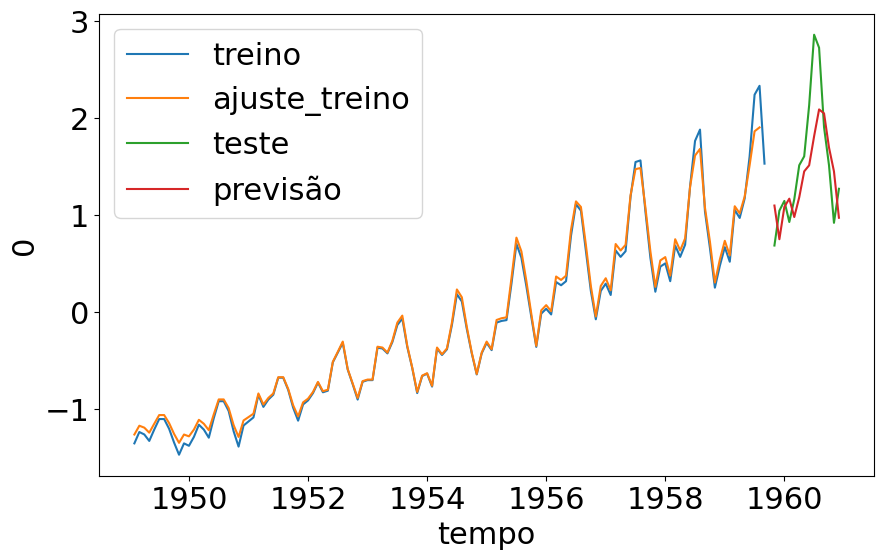

In [95]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129], label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo) [0], data=passageiros[1:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsão')

In [96]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [97]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [107]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [108]:
regressor4 = Sequential()
regressor4.add(Dense(8,input_dim=4, kernel_initializer='Ones', activation = 'linear', use_bias=False))
regressor4.add(Dense(64,kernel_initializer='random_uniform', activation='sigmoid', use_bias=False))
regressor4.add(Dense(1,kernel_initializer='random_uniform',activation='linear', use_bias=False))
regressor4.compile(loss='mean_squared_error', optimizer = 'adam')
regressor4.fit(xtreino_novo,ytreino_novo,epochs=600)

Epoch 1/600
4/4 [==============================] - 0s 4ms/step - loss: 0.7445
Epoch 2/600
4/4 [==============================] - 0s 5ms/step - loss: 0.6778
Epoch 3/600
4/4 [==============================] - 0s 3ms/step - loss: 0.6075
Epoch 4/600
4/4 [==============================] - 0s 4ms/step - loss: 0.5448
Epoch 5/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4816
Epoch 6/600
4/4 [==============================] - 0s 3ms/step - loss: 0.4237
Epoch 7/600
4/4 [==============================] - 0s 4ms/step - loss: 0.3607
Epoch 8/600
4/4 [==============================] - 0s 3ms/step - loss: 0.3099
Epoch 9/600
4/4 [==============================] - 0s 3ms/step - loss: 0.2582
Epoch 10/600
4/4 [==============================] - 0s 3ms/step - loss: 0.2208
Epoch 11/600
4/4 [==============================] - 0s 4ms/step - loss: 0.1900
Epoch 12/600
4/4 [==============================] - 0s 4ms/step - loss: 0.1702
Epoch 13/600
4/4 [==============================] - 0s 4ms/st

In [109]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 3ms/step


In [110]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 23ms/step


In [111]:
resultado_treino = pd.DataFrame(y_predict_novo) [0]

In [112]:
resultado = pd.DataFrame(y_predict_teste_novo) [0]

<Axes: xlabel='tempo'>

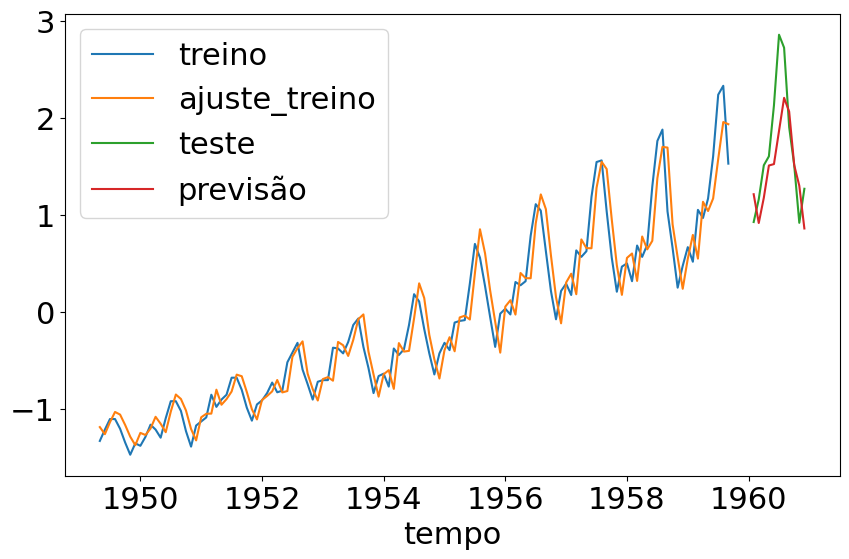

In [113]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129], label='treino')
sns.lineplot(x='tempo',y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino')
sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsão')

Usando a bicicletas.csv


In [115]:
bike = pd.read_csv('bicicletas.csv')

In [117]:
bike.head()

,datas,contagem,temperatura,sensacao,umidade,vel_vento,clima,feriado,final_ds,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [118]:
bike['datas'] = pd.to_datetime(bike['datas'])

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

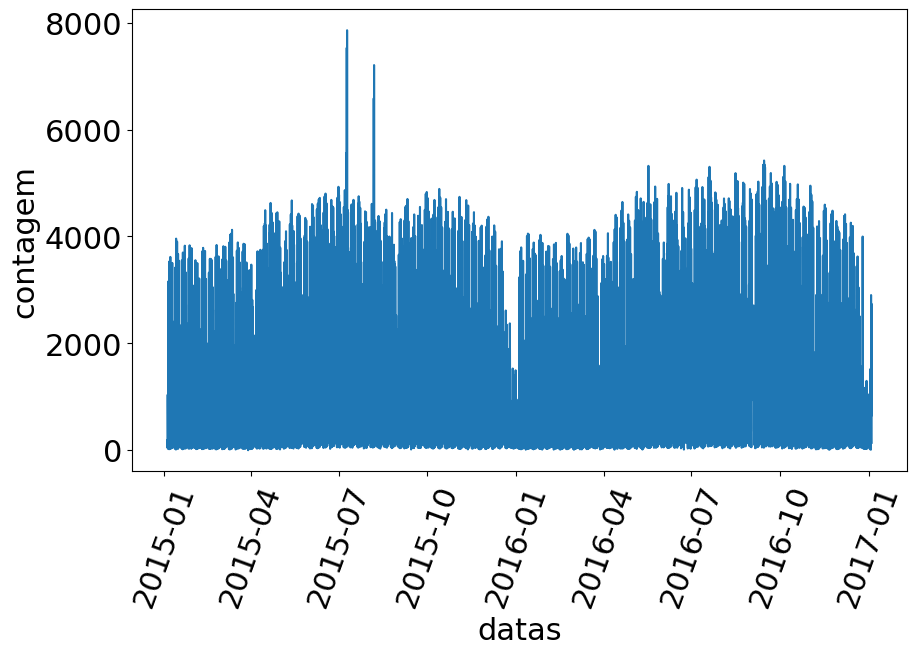

In [120]:
sns.lineplot(x='datas', y='contagem', data=bike)
plt.xticks(rotation=70)

In [122]:
sc2 = StandardScaler()

In [124]:
sc2.fit(bike['contagem'].values.reshape(-1,1))

StandardScaler()

In [125]:
y = sc2.transform(bike['contagem'].values.reshape(-1,1))

In [129]:
tamanho_treino = int(len(bike)*0.9)
tamanho_teste = len(bike)-tamanho_treino

In [130]:
ytreino = y [0:tamanho_treino]

In [131]:
yteste = y[tamanho_treino:len(bike)]

(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.,
        17167.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10'),
  Text(17167.0, 0, '2017-01')])

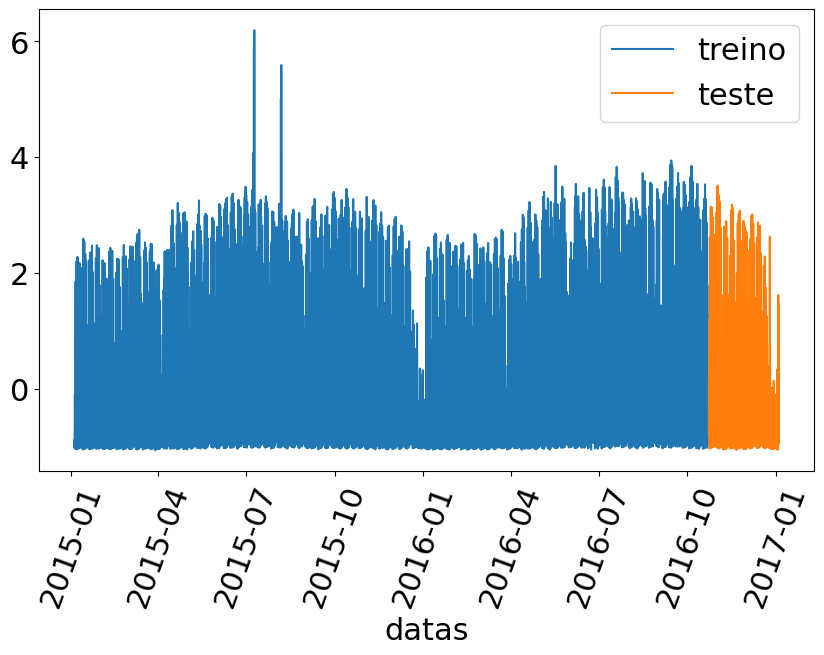

In [139]:
sns.lineplot(x='datas', y= ytreino[:,0],data=bike[0:tamanho_treino],label='treino')
sns.lineplot(x='datas',y=yteste[:,0], data=bike[tamanho_treino:len(bike)], label='teste')
plt.xticks(rotation=70)

In [133]:
vetor = pd.DataFrame(ytreino)[0]
xtreino_novo, ytreino_novo = separa_dados(vetor,10)

In [134]:
xtreino_novo

array([[-0.88574518, -0.9262953 , -0.92998167, ..., -0.9843557 ,
        -0.93274645, -0.77607553],
       [-0.9262953 , -0.92998167, -0.98712048, ..., -0.93274645,
        -0.77607553, -0.56687377],
       [-0.92998167, -0.98712048, -1.01016032, ..., -0.77607553,
        -0.56687377, -0.38347663],
       ...,
       [-0.02774148, -0.29131727, -0.4323211 , ..., -0.72630948,
        -0.8534894 , -0.91523618],
       [-0.29131727, -0.4323211 , -0.51065656, ..., -0.8534894 ,
        -0.91523618, -0.9548647 ],
       [-0.4323211 , -0.51065656, -0.55212827, ..., -0.91523618,
        -0.9548647 , -0.9548647 ]])

In [137]:
vetor2 = pd.DataFrame(yteste)[0]

In [138]:
xteste_novo, yteste_novo = separa_dados(vetor2,10)

LSTM

In [140]:
xtreino_novo = xtreino_novo.reshape((xtreino_novo.shape[0], xtreino_novo.shape[1],1))

In [142]:
xteste_novo = xteste_novo.reshape((xteste_novo.shape[0], xteste_novo.shape[1],1))

In [143]:
from tensorflow.keras.layers import LSTM

In [146]:
recorrente = Sequential()
recorrente.add(LSTM(128,input_shape=(xtreino_novo.shape[1], xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
recorrente.compile(loss='mean_squared_error', optimizer='RMSProp')
resultado = recorrente.fit(xtreino_novo, ytreino_novo, validation_data=(xteste_novo,yteste_novo), epochs=100)

Epoch 1/100
490/490 [==============================] - 10s 16ms/step - loss: 0.2785 - val_loss: 0.1001
Epoch 2/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0835 - val_loss: 0.0348
Epoch 3/100
490/490 [==============================] - 7s 15ms/step - loss: 0.0569 - val_loss: 0.0440
Epoch 4/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0482 - val_loss: 0.0259
Epoch 5/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0441 - val_loss: 0.0265
Epoch 6/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0410 - val_loss: 0.0247
Epoch 7/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0387 - val_loss: 0.0310
Epoch 8/100
490/490 [==============================] - 7s 14ms/step - loss: 0.0370 - val_loss: 0.0277
Epoch 9/100
490/490 [==============================] - 8s 17ms/step - loss: 0.0356 - val_loss: 0.0258
Epoch 10/100
490/490 [==============================] - 8s 17ms/step - loss: 0.03

In [147]:
y_ajustado = recorrente.predict(xtreino_novo)

490/490 [==============================] - 4s 6ms/step


(array([16436., 16526., 16617., 16709., 16801., 16892., 16983., 17075.]),
 [Text(16436.0, 0, '2015-01'),
  Text(16526.0, 0, '2015-04'),
  Text(16617.0, 0, '2015-07'),
  Text(16709.0, 0, '2015-10'),
  Text(16801.0, 0, '2016-01'),
  Text(16892.0, 0, '2016-04'),
  Text(16983.0, 0, '2016-07'),
  Text(17075.0, 0, '2016-10')])

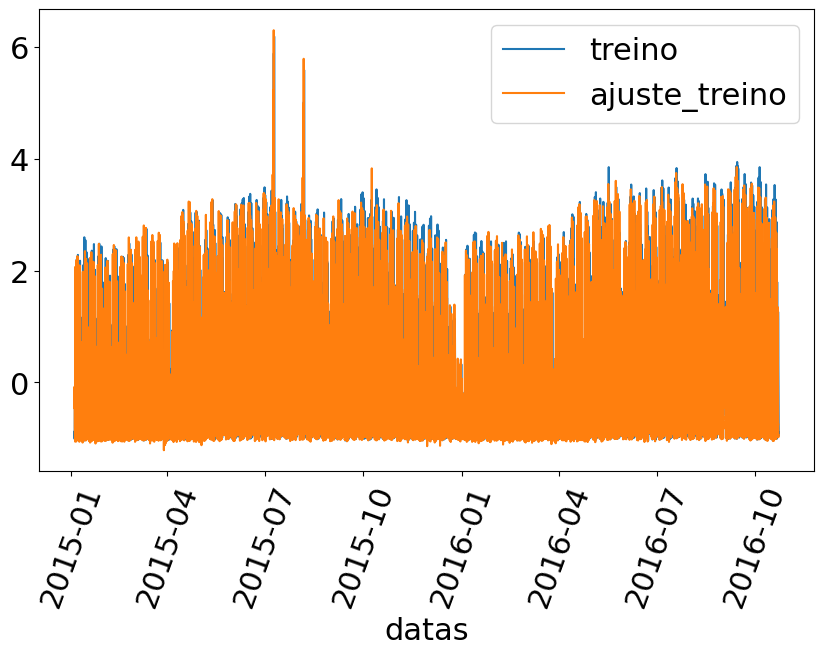

In [148]:
sns.lineplot(x='datas',y=ytreino[:,0],data=bike[0:tamanho_treino], label='treino')
sns.lineplot(x='datas',y=y_ajustado[:,0],data=bike[0:15662],label='ajuste_treino')
plt.xticks(rotation=70)

In [149]:
y_predito = recorrente.predict(xteste_novo)

55/55 [==============================] - 1s 10ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

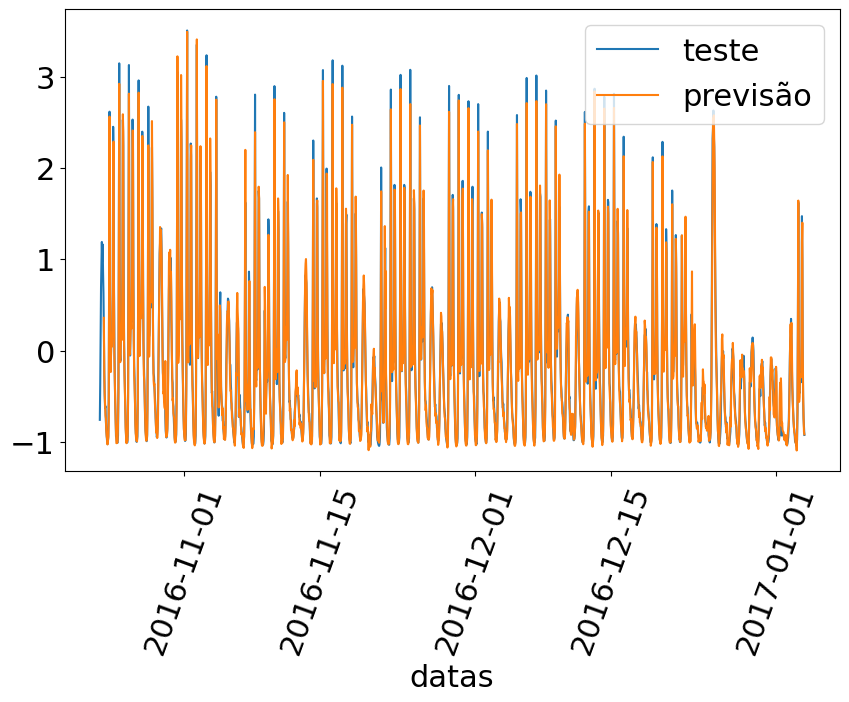

In [150]:
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)], label='teste')
sns.lineplot(x='datas',y=y_predito[:,0],data=bike[tamanho_treino+10:len(bike)], label='previsão')
plt.xticks(rotation=70)

UNIDADE RECORRENTE FECHADA - GRU

In [151]:
from tensorflow.keras.layers import GRU

In [154]:
recorrente_g = Sequential()
recorrente_g.add(GRU(128,input_shape=(xtreino_novo.shape[1],xtreino_novo.shape[2])))
recorrente.add(Dense(units=1))
recorrente_g.compile(loss='mean_squared_error',optimizer='RMSProp')
resultado2 = recorrente_g.fit(xtreino_novo,ytreino_novo, validation_data=(xteste_novo,yteste_novo),epochs=100)

Epoch 1/100
490/490 [==============================] - 11s 14ms/step - loss: 0.6899 - val_loss: 0.3938
Epoch 2/100
490/490 [==============================] - 6s 11ms/step - loss: 0.4931 - val_loss: 0.3477
Epoch 3/100
490/490 [==============================] - 7s 13ms/step - loss: 0.4420 - val_loss: 0.3541
Epoch 4/100
490/490 [==============================] - 5s 11ms/step - loss: 0.4056 - val_loss: 0.2573
Epoch 5/100
490/490 [==============================] - 7s 13ms/step - loss: 0.3850 - val_loss: 0.2543
Epoch 6/100
490/490 [==============================] - 5s 11ms/step - loss: 0.3684 - val_loss: 0.2369
Epoch 7/100
490/490 [==============================] - 7s 13ms/step - loss: 0.3560 - val_loss: 0.2967
Epoch 8/100
490/490 [==============================] - 6s 11ms/step - loss: 0.3469 - val_loss: 0.2402
Epoch 9/100
490/490 [==============================] - 7s 13ms/step - loss: 0.3361 - val_loss: 0.2229
Epoch 10/100
490/490 [==============================] - 6s 11ms/step - loss: 0.32

In [155]:
y_predito2 = recorrente_g.predict(xteste_novo)

55/55 [==============================] - 1s 4ms/step


(array([17106., 17120., 17136., 17150., 17167.]),
 [Text(17106.0, 0, '2016-11-01'),
  Text(17120.0, 0, '2016-11-15'),
  Text(17136.0, 0, '2016-12-01'),
  Text(17150.0, 0, '2016-12-15'),
  Text(17167.0, 0, '2017-01-01')])

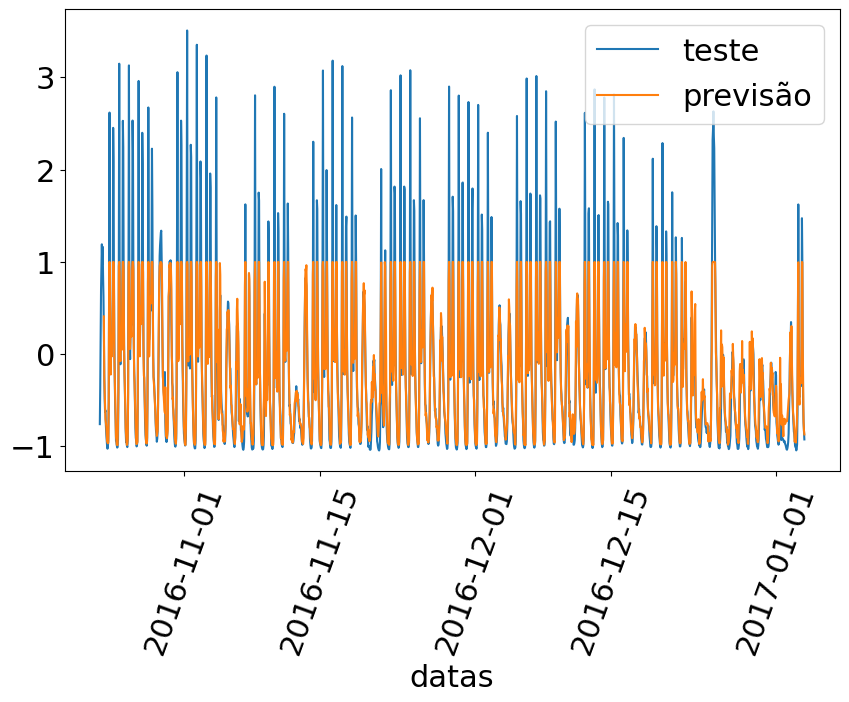

In [157]:
sns.lineplot(x='datas',y=yteste[:,0],data=bike[tamanho_treino:len(bike)],label='teste')
sns.lineplot(x='datas',y=y_predito2[:,0],data=bike[tamanho_treino+10:len(bike)],label='previsão')
plt.xticks(rotation=70)

In [158]:
print(resultado2.history.keys())

dict_keys(['loss', 'val_loss'])


Text(0, 0.5, 'Custo')

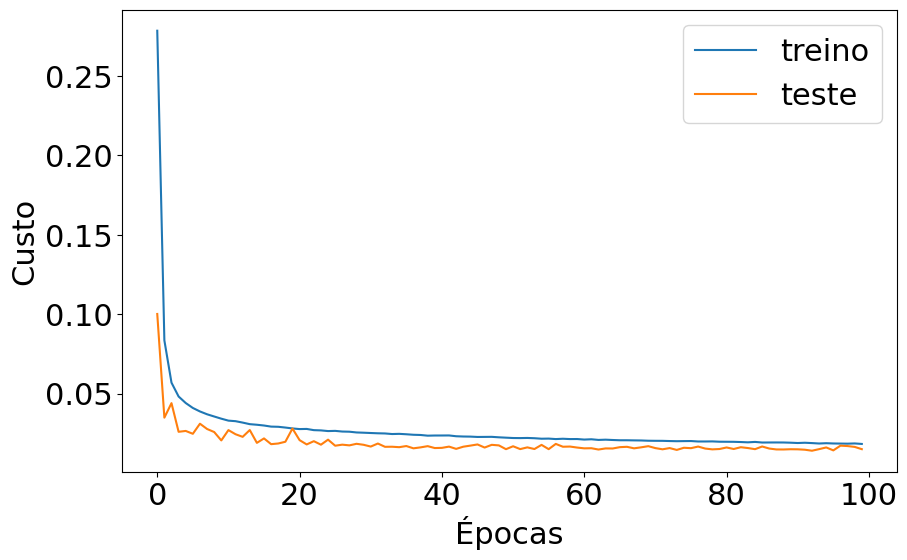

In [161]:
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')

Text(0, 0.5, 'Custo')

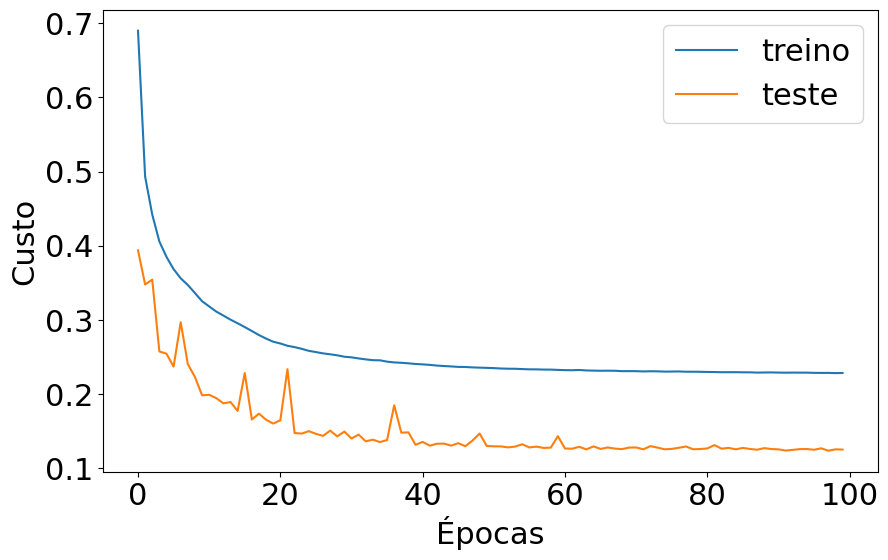

In [162]:
plt.plot(resultado2.history['loss'])
plt.plot(resultado2.history['val_loss'])
plt.legend(['treino','teste'])
plt.xlabel('Épocas')
plt.ylabel('Custo')